# BUSINESS PROBLEM

The company XPTO sells digital educational products such as training, short and long courses, and tutoring. They have a wide variety of customers; some people use just the free products that the company offers as a hook to sell other products, while others buy the complete product with real-time classes, videos, and tutoring.

The company needs to improve sales and wants to implement new marketing campaigns for each group according to their purchase history, offering discounts based on the client profile.

**Project Objectives:**
- Identify customer groups and create profiles for them.
- Design a marketing strategy based on an ideal customer group with the intention of improving client retention and increasing revenue.

For this problem, I will apply the RFM analysis and clustering. RFM was chosen because it is a technique used in the company in other projects, and people are familiar with it, so they decided to follow the same strategy. It is also important to mention that we have a limited number of variables.

# RFM ANALYSIS

**RFM** is a common technique used in marketing to segment customer data by plotting customers into a three-dimensional space using three metrics:

- Recency: a measure of how recently a customer last purchased.
- Frequency: how often they purchase within a given time period.
- Monetary: the amount they spend within a given time period.

Using these three parameters, customers are classified into nine categories. This customer segmentation helps in the decision-making process for targeted marketing strategies and customer success, offering discounts and promotions, different kinds of products, etc.

# SOLUTION PIPELINE

1. Define the business problem.
2. Initial data understanding and exploratory data analysis.
3. Data cleaning and preprocessing.
4. Group customers into clusters through modeling.
5. Analyze the groups created, profiling them (personas).
6. Suggest strategies for each group.


# LIBRARIES

In [4]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
%watermark

Last updated: 2024-07-01T14:30:01.258979-04:00

Python implementation: CPython
Python version       : 3.12.2
IPython version      : 8.22.2

Compiler    : MSC v.1937 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 167 Stepping 1, GenuineIntel
CPU cores   : 16
Architecture: 64bit



In [5]:
## bibliotecas
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime


pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_style('ticks')
warnings.filterwarnings('ignore')


%matplotlib inline
%watermark -w
%watermark -iv

Watermark: 2.4.3

pandas    : 2.2.1
matplotlib: 3.8.3
seaborn   : 0.13.2
numpy     : 1.26.4



In [6]:
# Suport Functions

sns.set_theme(style="darkgrid")

# 1. DATA

In [7]:
data = pd.read_csv('D:/OneDrive/PROJETOS_R_GIT/2024/RFV_PYTHON/DADOS/dados_csv.csv', encoding='latin')

In [8]:
data.head()

,id_op,price,date,status,id_client
0,367DA1E50D51E7118F0B00505698001D10987766660,0.000,6/14/2017,Not suitable,A098bb66660
1,4E7DA1E50D51E7118F0B00505698001D51126033138,0.000,6/14/2017,Unsuccessful contact,5AA26033A38
2,607DA1E50D51E7118F0B00505698001D51126033138,0.000,6/14/2017,Unsuccessful contact,5AA26033A38
3,667DA1E50D51E7118F0B00505698001D51126033138,0.000,6/14/2017,Unsuccessful contact,5AA26033A38
4,6C7DA1E50D51E7118F0B00505698001D51126033138,0.000,6/14/2017,Unsuccessful contact,5AA26033A38


- There are values 0 for id_client and it is incorrect. I will remove them.

In [9]:
data['status'].value_counts()

status
Billed                    81136
Change Plans - company    19436
Change Plans - client     16461
Not suitable               9778
Unsuccessful contact       7685
Interview Status            160
Name: count, dtype: int64

- We are only interested in the 'Billed' records.

In [10]:
print(f'The dataset has {data.shape[1]} columns and {data.shape[0]} rows.')

The dataset has 5 columns and 134656 rows.


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134656 entries, 0 to 134655
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id_op      134656 non-null  object 
 1   price      134656 non-null  float64
 2   date       134656 non-null  object 
 3   status     134656 non-null  object 
 4   id_client  134656 non-null  object 
dtypes: float64(1), object(4)
memory usage: 5.1+ MB


# 1.1. Data Dictionary

- id_client: just a number to identity the client
- price: product price in dolars
- data: date of the purchase or the last interaction between company and client
- status:
  - Billed: the client bought the product
  - Change Plans - Company: the company XPTO decide not to sell the product (??)
  - Change Plans - Client: the client declined the purchase
  - Not suitable - the product is not the ideal product for the client
  - Unsuccessful contact - the company tried to contact the client and it was unsuccessfull
  - Interview Status - the client probably try to have the interviwe or did it, but the company didn't update the status.

# 2. Exploratory Data Analysis and Feature Engineering

Before creating the new variables for the RFV, I will analyse the data and do the necessary treatments.


In [12]:
# Null Values

data.isnull().sum()

id_op        0
price        0
date         0
status       0
id_client    0
dtype: int64

In [13]:
data.duplicated().sum()

0

- There aren't any null values or duplicate data in the dataset.

In [14]:
# Removing id_client equals 0

data = data[data['id_client'] != '0']

In [15]:
data.shape

(121859, 5)

In [16]:
# Selecting only BILLED cases

data = data[data['status'] == 'Billed']

In [17]:
data.shape

(78587, 5)

## 2.1. Price

In [18]:
data['price'].describe()

count     78587.000
mean      13047.268
std       22136.636
min     -118100.000
25%           0.000
50%        4500.000
75%       19855.000
max     2389584.000
Name: price, dtype: float64

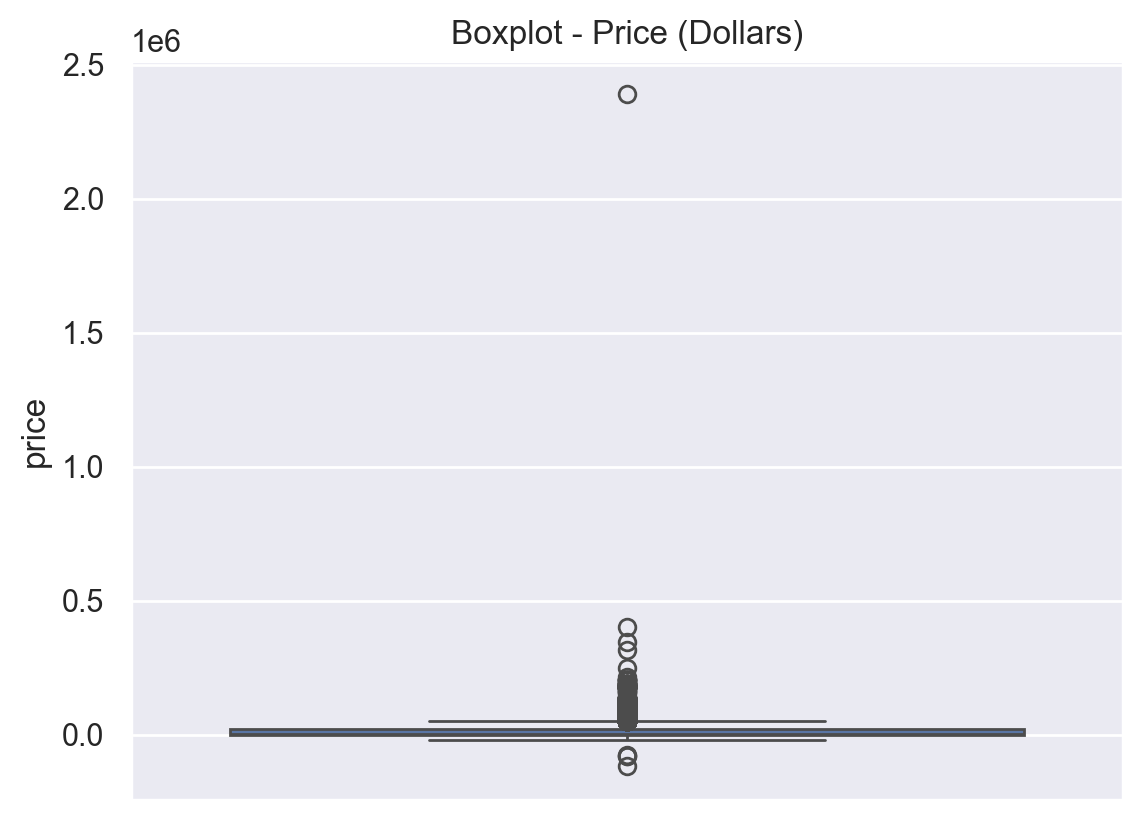

In [19]:
# Boxplot

sns.boxplot(y = data['price'])
plt.title('Boxplot - Price (Dollars)')
plt.show()

- The are some inconsistences in the prices, the maximum value of the company product is 80k dolares.
- There are some negative values.

In [20]:
print(f'There are {data['price'][data['price'] > 80000].size} above 80k')
print(f'There are {data['price'][data['price'] < 0].size} negative values.')

There are 1830 above 80k
There are 13 negative values.


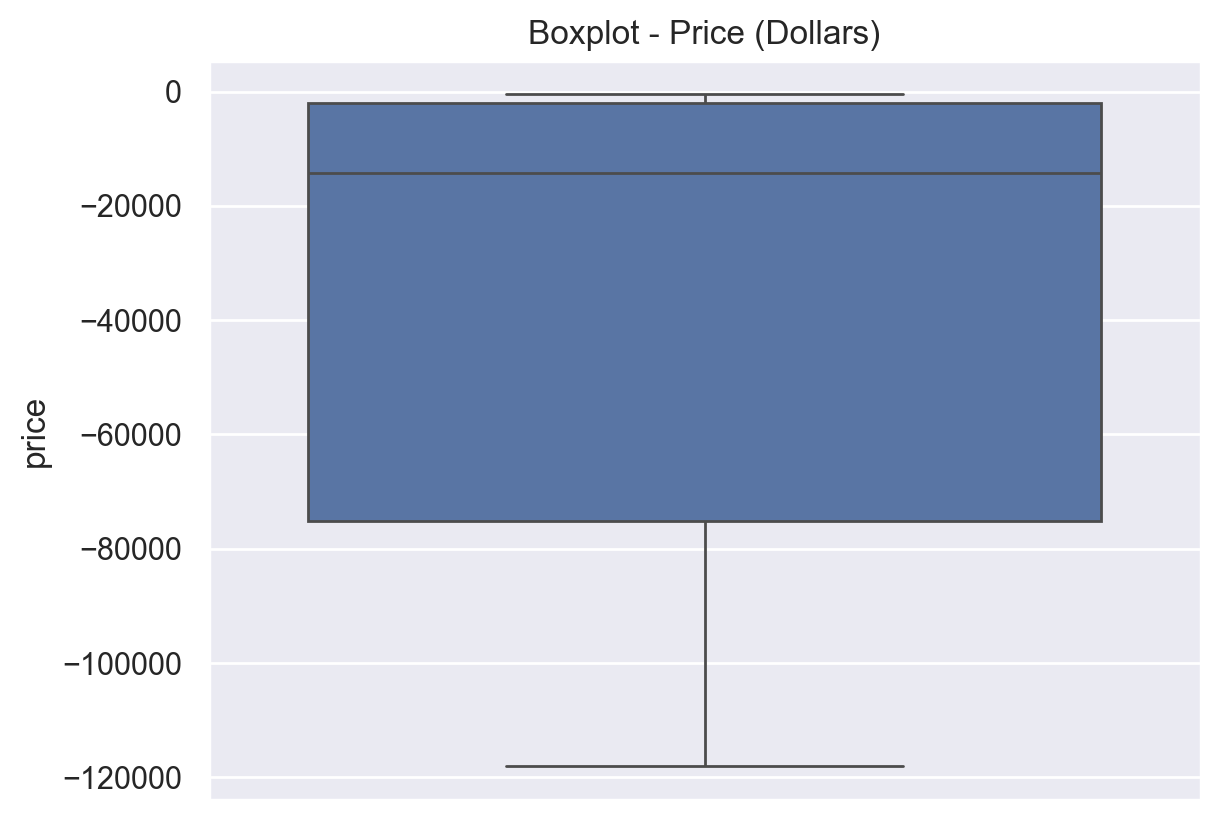

In [21]:
# Checking negative values

sns.boxplot(y = data[data['price'] < 0]['price'])
plt.title('Boxplot - Price (Dollars)')
plt.show()

- For the values higher than 80k, the values will be removed.
- For the negative values, according the business area, the values are positive.

In [22]:
data['price'] = data['price'].abs()
data_tmp = data[data['price'] < 80000].copy()

data_tmp.shape

(76755, 5)

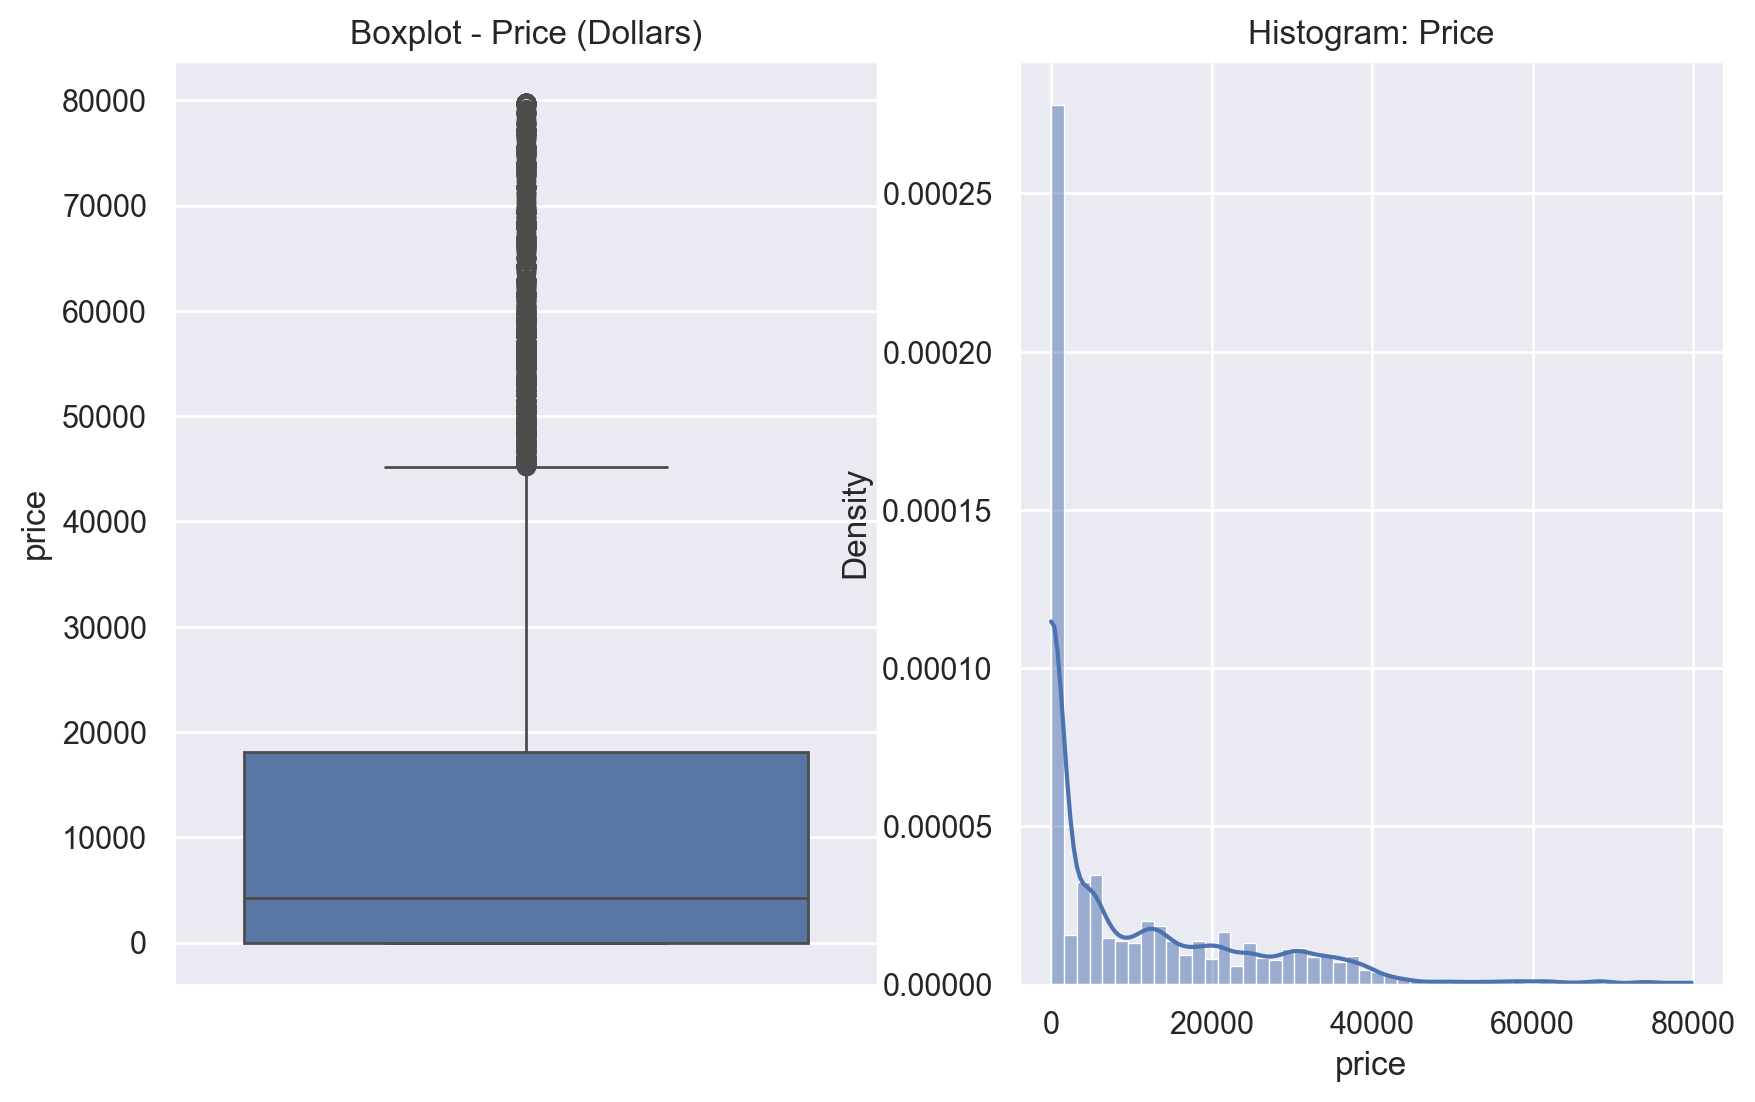

In [23]:
# Boxplot

fig, axes = plt.subplots(1,2, figsize = (10,6))

sns.boxplot(y = data_tmp['price'], ax = axes[0])
axes[0].set_title('Boxplot - Price (Dollars)')

sns.histplot(x = data_tmp['price'], ax = axes[1], stat='density', bins=50, kde = True)
axes[1].set_title('Histogram: Price')

plt.show()

In [24]:
data_tmp['price'].describe()

count   76755.000
mean    10881.963
std     14813.259
min         0.000
25%         0.000
50%      4200.000
75%     18114.240
max     79800.000
Name: price, dtype: float64

- The mean (average) value of the price column is approximately 10880.
- The standard deviation is about 14813.25, suggesting considerable variability in the price values.
- This means a significant portion of the data has a value of 0. (P25 = 0).
- The data is highly skewed since the mean is significantly higher than the median, and there is a wide range between the minimum (0) and maximum (79800) values.
- The presence of a maximum value significantly larger than the mean and standard deviation indicates possible outliers.


## 2.2. Date

In [25]:
# Converting to date

data_tmp['date']=pd.to_datetime(data_tmp['date'], errors='coerce')

In [26]:
print('Min:' ,data_tmp['date'].min())
print('Max:', data_tmp['date'].max())

Min: 2005-06-22 00:00:00
Max: 2023-11-01 00:00:00


- The dataset has data from 2005 to 2023. 
- The older records are not usefull for the company. We decided to remove all contacts that didn't have any interaction with us before 2018.

In [27]:
# Selecting the last purchase of each client
tmp_filter = data_tmp.groupby('id_client')['date'].max().reset_index()
clients_to_filter = tmp_filter[tmp_filter['date'] < '2018-01-01']['id_client'] 
clients_to_filter

4        00033355500
17       0028b24860b
31       003b3386680
59       0062648b30b
66       006b80A2504
            ...     
63543    bbbb0340b30
63546    bbbb36246A5
63548      bbbb85b06
63549     bbbb940bA6
63550     bbbb996932
Name: id_client, Length: 28252, dtype: object

In [28]:
data_tmp2 = data_tmp[~data_tmp['id_client'].isin(clients_to_filter)]

In [29]:
data_tmp2

,id_op,price,date,status,id_client
189,F92845854A1DE111BCE300505698001D21702373487,6450.000,2011-11-18,Billed,2Ab023b348b
191,5B51B1E65D5DEE11A29200505698001D01488095612,0.000,2023-09-27,Billed,0A4880956A2
192,027CA399E674EE11A29200505698001D01488095612,0.000,2023-10-27,Billed,0A4880956A2
193,E05CBB3CEA28EE11A29200505698001D02283653410,0.000,2023-07-22,Billed,022836534A0
194,26A3E271B7FFED11B22100505698001D01561852619,0.000,2023-05-31,Billed,A56A8526A9
...,...,...,...,...,...
134551,CDEB4C06AA84E611930800505698001D17683805890,0.000,2016-09-27,Billed,Ab683805890
134554,3A6B9B17AF84E611930800505698001D58366563120,6100.000,2016-09-27,Billed,58366563A20
134563,C5526490909FE611B78C00505698001D03723405630,10980.000,2016-10-31,Billed,3b23405630
134565,FF402F9A8FA2E611B78C00505698001D49467638649,10980.000,2016-11-04,Billed,4946b638649


In [30]:
print(data_tmp2['date'].min())
print(data_tmp2['date'].max())

2005-06-22 00:00:00
2023-11-01 00:00:00


In [31]:
print(f'The new dataset has {data_tmp2.shape[0]} rows and {data_tmp2.shape[1]} cols.')
print(f'After the tidying, the new data represents {round(data_tmp2.shape[0]/data.shape[0]*100,2)}% of the original dataset.')

The new dataset has 44644 rows and 5 cols.
After the tidying, the new data represents 56.81% of the original dataset.


## 2.3. How many times and how much do the clients buy?

In [32]:
amount_purchase = data_tmp2.groupby('id_client')['price'].agg(amount='count', total_purchase='sum').reset_index()
amount_purchase['avg_purchase'] = amount_purchase['total_purchase']/amount_purchase['amount']
amount_purchase.sort_values('amount', ascending=False)

,id_client,amount,total_purchase,avg_purchase
11762,428025803A0,17,17010.000,1000.588
9941,39A06Ab58A3,16,0.000,0.000
22637,8Ab90805953,15,57119.870,3807.991
14350,4b892b3806,14,34291.320,2449.380
13639,4990335b6b2,14,18810.000,1343.571
...,...,...,...,...
12876,45AAbb5680,1,0.000,0.000
12875,45AA3432920,1,0.000,0.000
12874,45AA02A503,1,0.000,0.000
12871,45A9853b888,1,4365.000,4365.000


- There are 35.300 clients.

In [33]:
# Purchases equal 0

print(f'{amount_purchase[amount_purchase['total_purchase'] == 0].shape[0]} clients didn`t buy any product.')

20321 clients didn`t buy any product.


In [34]:
print(f'{amount_purchase[amount_purchase['total_purchase'] == 0].shape[0]} didn`t spend and only use the free products. It represents {round(amount_purchase[amount_purchase['total_purchase'] == 0].shape[0]/amount_purchase.shape[0]*100,2)}%.')

20321 didn`t spend and only use the free products. It represents 57.57%.


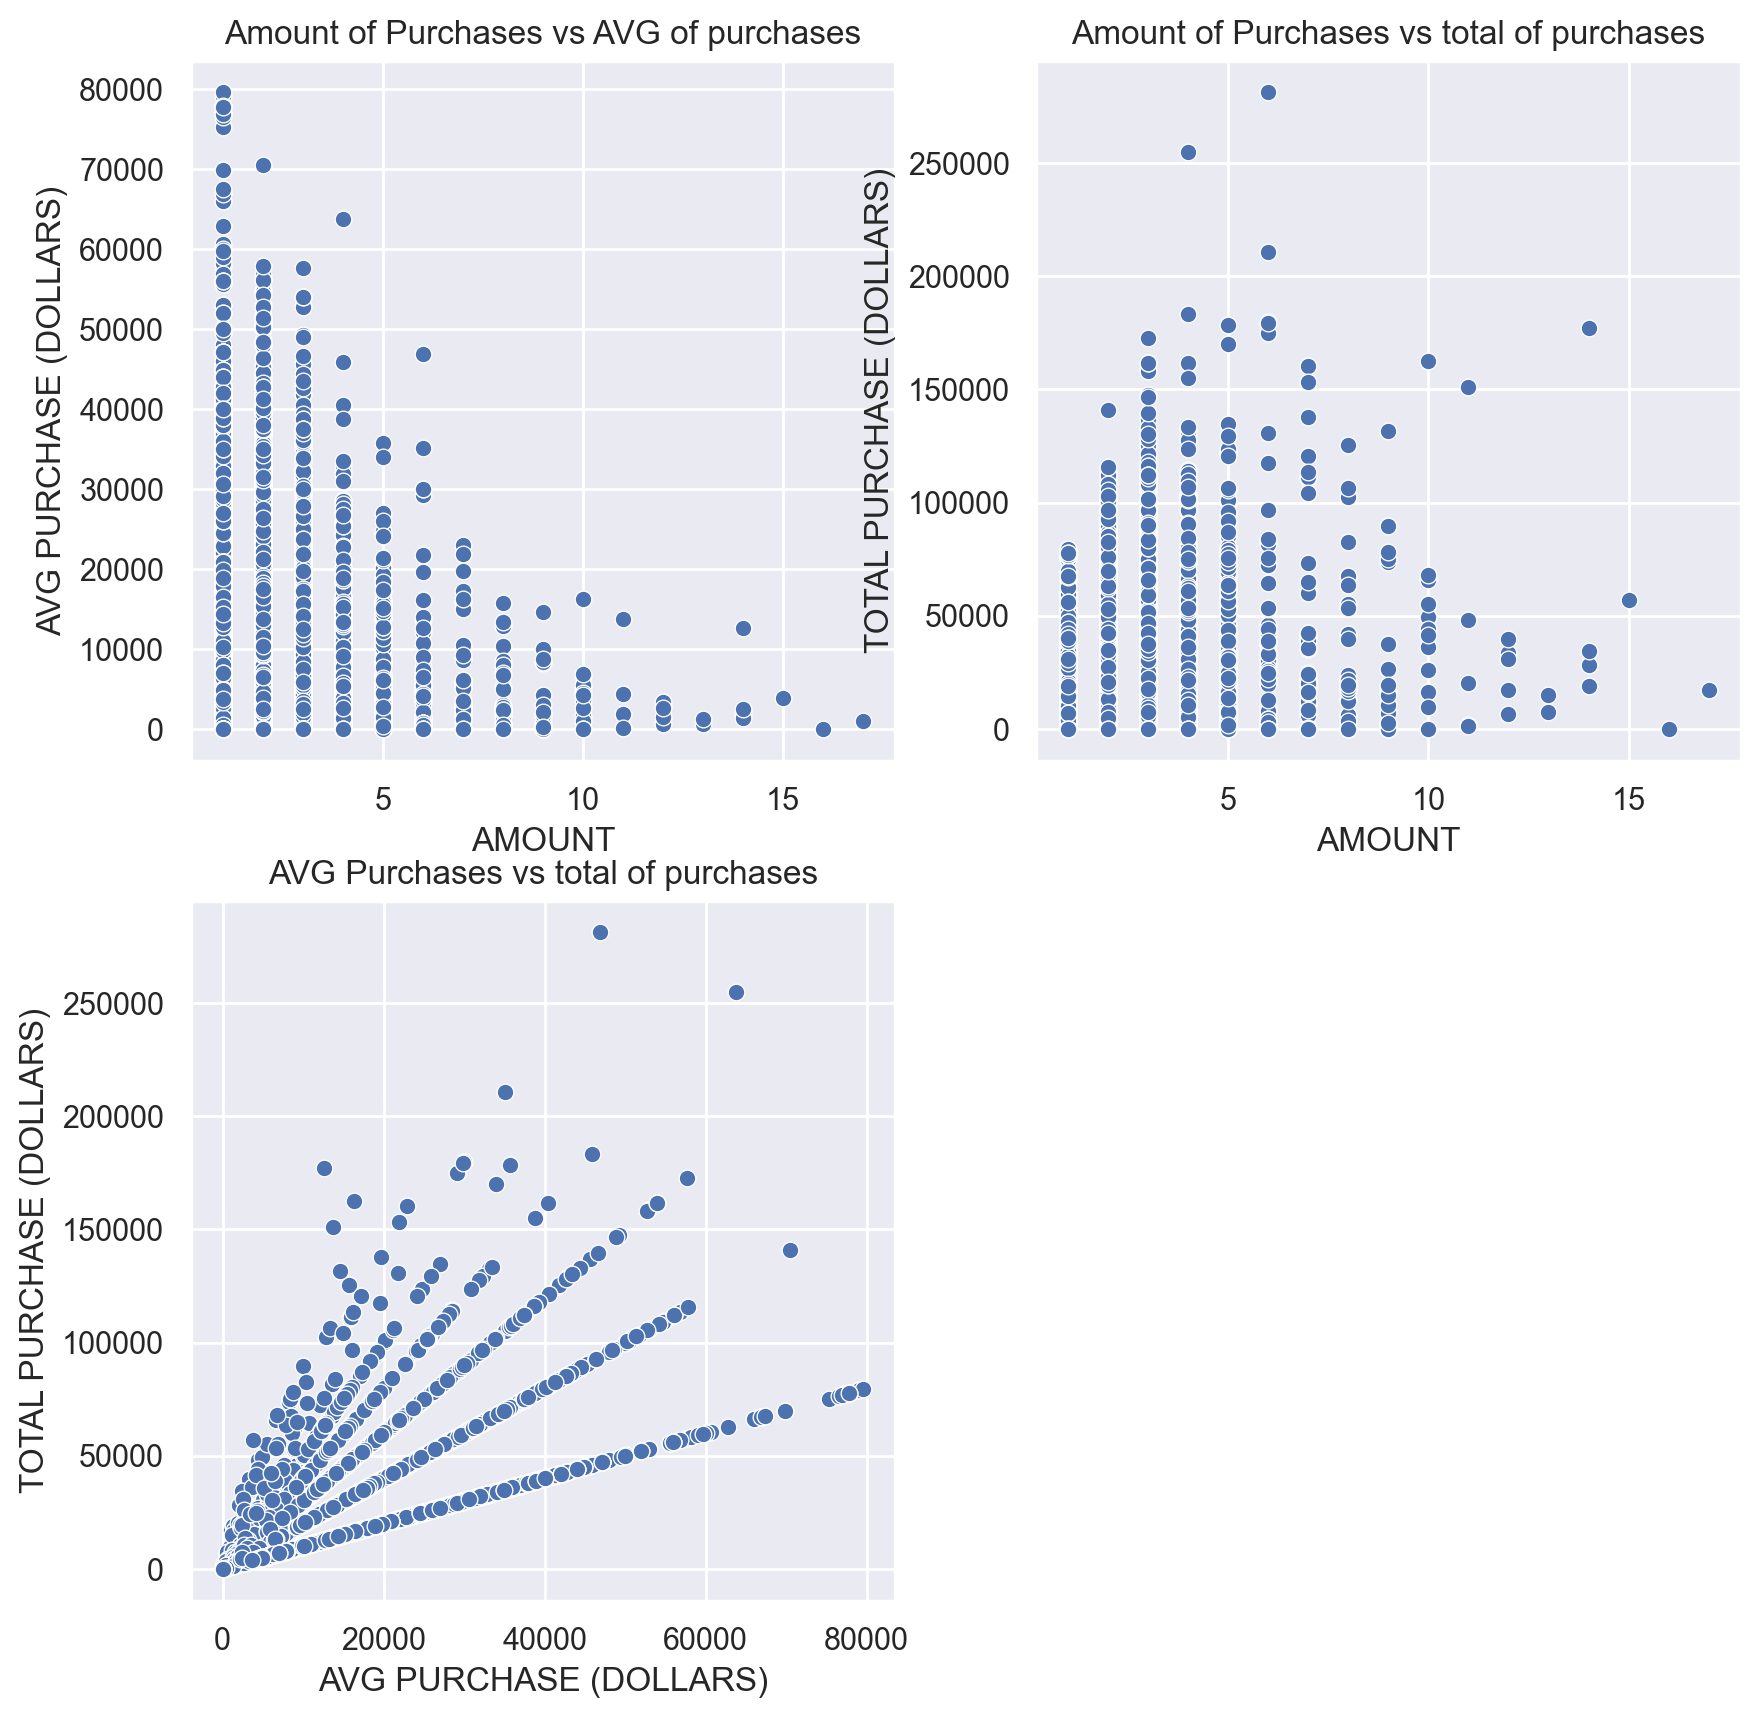

In [35]:
# Scatterplot

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.scatterplot(x = amount_purchase['amount'], y = amount_purchase['avg_purchase'])
plt.title('Amount of Purchases vs AVG of purchases')
plt.ylabel('AVG PURCHASE (DOLLARS)')
plt.xlabel('AMOUNT')

plt.subplot(2,2,2)
sns.scatterplot(x = amount_purchase['amount'], y = amount_purchase['total_purchase'])
plt.title('Amount of Purchases vs total of purchases')
plt.ylabel('TOTAL PURCHASE (DOLLARS)')
plt.xlabel('AMOUNT')

plt.subplot(2,2,3)
sns.scatterplot(x = amount_purchase['avg_purchase'], y = amount_purchase['total_purchase'])
plt.title('AVG Purchases vs total of purchases')
plt.ylabel('TOTAL PURCHASE (DOLLARS)')
plt.xlabel('AVG PURCHASE (DOLLARS)')

plt.show()

In [211]:
amount_purchase.describe()

,amount,total_purchase,avg_purchase
count,35300.000,35300.000,35300.000
mean,1.265,9813.186,7743.518
std,0.785,16621.698,12345.392
min,1.000,0.000,0.000
25%,1.000,0.000,0.000
50%,1.000,0.000,0.000
75%,1.000,16468.000,12593.700
max,17.000,281423.960,79560.000


- There are many clients who purchase just once, and the range of purchases is large; we can see values from 0 to 80k.
- Some clients bought many products and paid, on average, less than 10k.
- Most clients bought only once.
- 50% of the clients consume only 'free' content.
- The maximum value that one client spent is 281k dollars.

In [196]:
amount_purchase[(amount_purchase['amount'] > 8) & (amount_purchase['total_purchase'] == 0)]

,id_client,amount,total_purchase,avg_purchase
9941,39A06Ab58A3,16,0.000,0.000
12438,44636032268,9,0.000,0.000
18387,654638AAAb2,9,0.000,0.000
21428,85bA3A55234,9,0.000,0.000
25550,9b40A93994,9,0.000,0.000
25627,9b6A99A652,10,0.000,0.000
31590,AAA8082362A,10,0.000,0.000
33361,b43209984b2,10,0.000,0.000


In [41]:
proportion = amount_purchase[amount_purchase['amount'] == 1].size/amount_purchase.size
print(f"Proportion of records where amount equals 1: {proportion:.2%}")

Proportion of records where amount equals 1: 83.10%


# 2.3. Recency

In [214]:
date_ref = data_tmp2['date'].max()

In [237]:
date2 = data_tmp2.groupby('id_client')['date'].max().reset_index()
date2['recency'] = date_ref - date2['date']
date2['recency'] = date2['recency'].dt.days
date2

,id_client,date,recency
0,00006A95660,2020-03-02,1339
1,000226822A0,2021-01-14,1021
2,00026208A2A,2021-04-22,923
3,00032b5965b,2023-02-28,246
4,00035Ab4AA0,2020-03-12,1329
...,...,...,...
35295,bbb95b9654,2018-03-23,2049
35296,bbbb0420Ab2,2022-04-01,579
35297,bbbb3349649,2018-08-29,1890
35298,bbbb422A9b2,2019-03-27,1680


In [239]:
date2['recency'].describe()

count   35300.000
mean      985.594
std       651.366
min         0.000
25%       407.000
50%       934.000
75%      1570.000
max      2129.000
Name: recency, dtype: float64

Text(0.5, 1.0, 'Boxplot VAR: Recency')

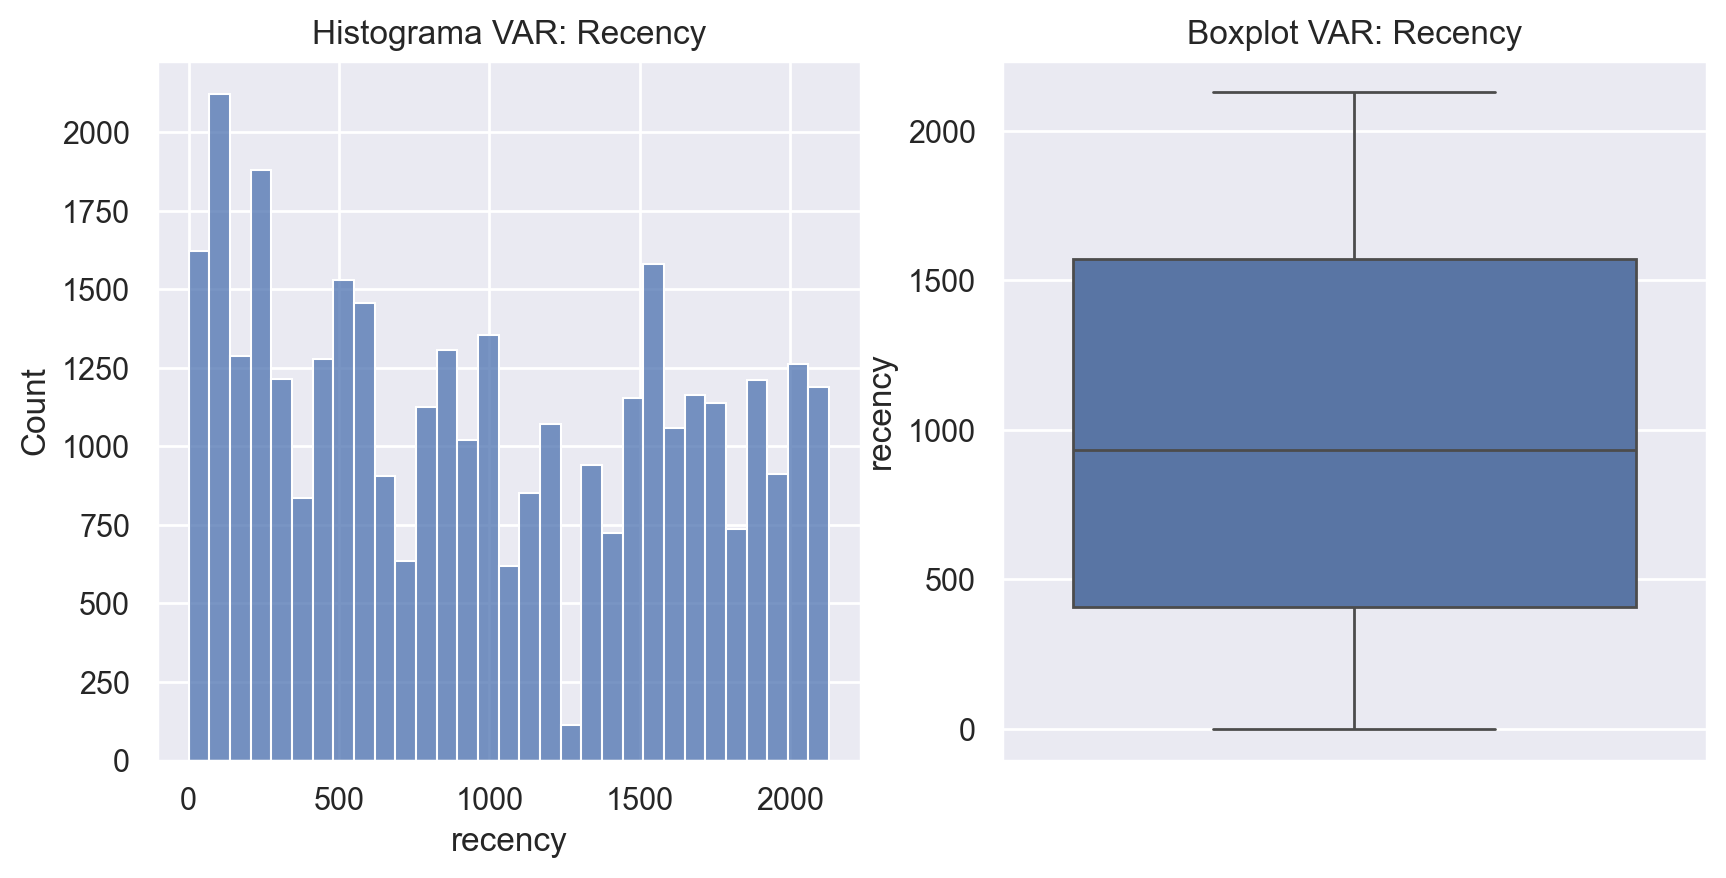

In [244]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.histplot(date2['recency'])
plt.title('Histograma VAR: Recency')


plt.subplot(2,2,2)
sns.boxplot(date2['recency'])
plt.title('Boxplot VAR: Recency')



- The mean and median values are fairly close (985.594 vs. 934.000).
- A high standard deviation (651.366) shows a wide spread in the recency values, indicating that while some customers have purchased recently, others have not purchased for a significantly long time.
- The minimum and maximum values highlight the range of recency, showing that some customers are very recent while others have not made a purchase in several years.
- The percentiles (25%, 50%, 75%) provide insights into the distribution:
    - 25% of customers are quite recent (within 407 days).
    - 50% of customers (the median) last purchased within about 2.5 years (934 days).
    - 75% of customers last purchased within a little over 4 years (1570 days).

# 3. DataSet - RFV

In [251]:
df_final = amount_purchase.merge(date2)

In [252]:
df_final = df_final[['id_client', 'amount', 'total_purchase', 'recency']]

In [255]:
df_final.to_csv('DADOS\df_final_rfv.csv')

# 4. EDA Conclusions

Main insights:
1. Price variable issues:
   - Some values in the CRM have negative prices, which is an anomaly.
   - Some prices exceed the highest known product price, indicating possible data entry errors or inconsistencies.
2. 63% of the records are clients who made their last purchase before 2018 and have not bought anything since then. These records were excluded from the clustering analysis to focus on more relevant data.
3. Considering only the valid records, 57.57% of the clients have not made any purchase.
   - It could be beneficial to analyze these inactive clients to understand the reasons behind their lack of purchases. Beyond the peak, there is a relatively flat distribution of clients over the remaining period, suggesting a steady rate of recent client activity.
4. The recency graph shows a peak in the lower numbers, indicating a significant number of clients have made recent purchases, but there is a kind of flat amount of clients during the period.
5. Clients who spent more money on average per purchase tend to have fewer total purchases.
6. 83% of the clients purchased only one product.
